## Numpy

In [1]:
import numpy as np
from IPython.display import Image


### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [2]:
import random

### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [3]:
from math import sin, cos
import timeit


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [4]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def cube_sum_opt(x):
    return np.sum(np.power(x,3))

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def almost_variance_opt(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = np.mean(x)
    return np.mean(np.power(x-m,4))
    

array = range(1,100000)
print("cube sum")
%timeit -n 10 cube_sum(array)
%timeit -n 10 cube_sum_opt(array)
print("almost variance")
%timeit -n 10 almost_variance(array)
%timeit -n 10 almost_variance_opt(array)


cube sum
13.6 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.88 ms ± 65.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
almost variance
16.2 ms ± 378 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
15.2 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

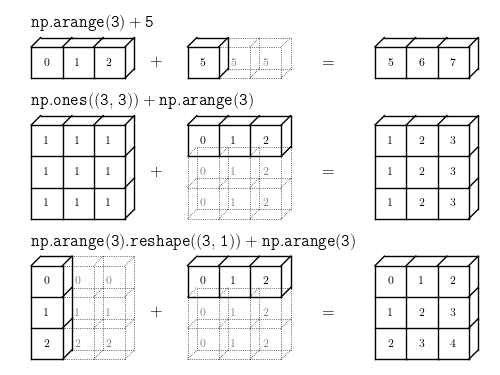

In [5]:
Image("http://www.astroml.org/_images/fig_broadcast_visual_1.png")

In [6]:
print(np.arange(1,11).reshape(10,1)* np.arange(1,11))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [7]:
points = np.round(np.random.random((10,5)),2)
print(points.shape)
print(points[:, np.newaxis].shape)
differences =np.round( points - points[:, np.newaxis],2)
print(differences.shape)


distances = np.sqrt(np.sum(differences**2, axis=2))
print(np.round(distances,2))

(10, 5)
(10, 1, 5)
(10, 10, 5)
[[0.   0.94 0.61 0.59 1.14 1.28 1.17 1.23 0.89 1.11]
 [0.94 0.   0.43 0.65 0.81 0.79 0.44 0.92 0.35 0.89]
 [0.61 0.43 0.   0.5  0.94 0.79 0.81 0.91 0.5  0.98]
 [0.59 0.65 0.5  0.   0.81 1.01 0.78 1.08 0.81 1.06]
 [1.14 0.81 0.94 0.81 0.   0.85 0.66 0.99 1.08 0.58]
 [1.28 0.79 0.79 1.01 0.85 0.   0.99 0.7  1.04 1.02]
 [1.17 0.44 0.81 0.78 0.66 0.99 0.   1.07 0.67 0.87]
 [1.23 0.92 0.91 1.08 0.99 0.7  1.07 0.   1.   1.  ]
 [0.89 0.35 0.5  0.81 1.08 1.04 0.67 1.   0.   1.  ]
 [1.11 0.89 0.98 1.06 0.58 1.02 0.87 1.   1.   0.  ]]


### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

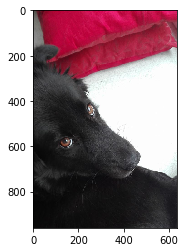

In [9]:
img = mpimg.imread('images/doggo.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$